<a href="https://colab.research.google.com/github/swathypk93/swathypk93/blob/main/walmart_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded.keys())


Saving walmart_data.csv to walmart_data (7).csv
dict_keys(['walmart_data (7).csv'])


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['walmart_data (7).csv']))


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('walmart_data (6).csv')

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.head()



Shape of dataset: (550068, 10)

Data Types:
 User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Missing Values:
 User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


No missing values

550,068 rows and 10 columns

In [ ]:

cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes


,0
User_ID,int64
Product_ID,object
Gender,category
Age,category
Occupation,int64
City_Category,category
Stay_In_Current_City_Years,category
Marital_Status,category
Product_Category,int64
Purchase,int64


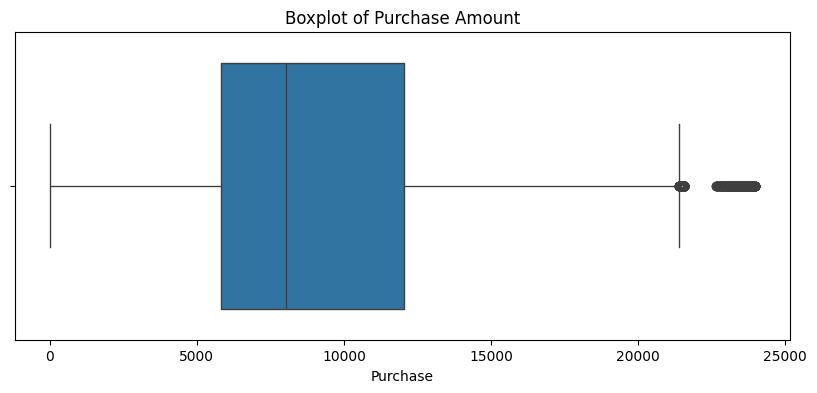

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Purchase'])
plt.title('Boxplot of Purchase Amount')
plt.show()
df['Purchase'].describe()


The purchase amount has a few high-value outliers, especially above ₹20,000.

In [ ]:

lower = df['Purchase'].quantile(0.05)
upper = df['Purchase'].quantile(0.95)

df['Purchase'] = np.clip(df['Purchase'], lower, upper)


In [ ]:

lower = df['Purchase'].quantile(0.05)
upper = df['Purchase'].quantile(0.95)

df['Purchase'] = np.clip(df['Purchase'], lower, upper)


Gender-wise Average Purchase





<ipython-input-16-0def67c96fd8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_purchase = df.groupby('Gender')['Purchase'].mean()


Gender
F    8736.540266
M    9427.240997
Name: Purchase, dtype: float64


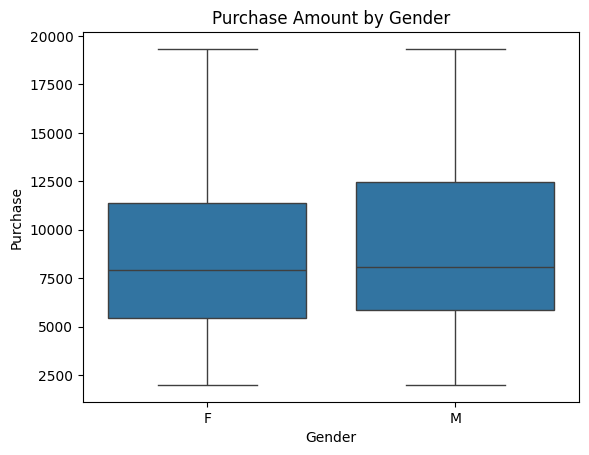

In [ ]:

gender_purchase = df.groupby('Gender')['Purchase'].mean()
print(gender_purchase)

sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Purchase Amount by Gender")
plt.show()


Men spent more on average than women during Black Friday in this dataset.

The difference is ~₹690.

Marital Status vs Purchase

<ipython-input-17-f12be2056bb2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_purchase = df.groupby('Marital_Status')['Purchase'].mean()


Marital_Status
0    9258.820464
1    9253.669823
Name: Purchase, dtype: float64


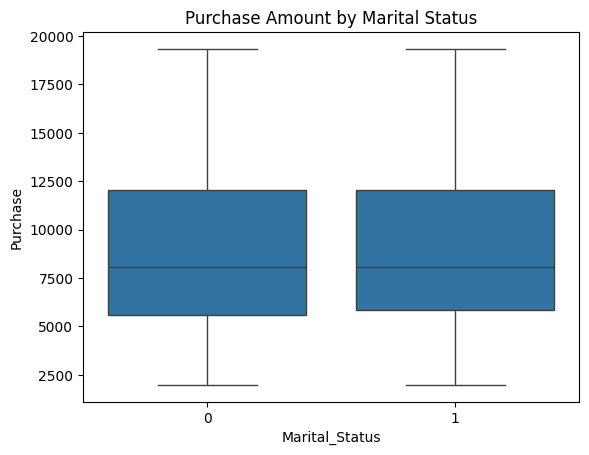

In [ ]:

marital_purchase = df.groupby('Marital_Status')['Purchase'].mean()
print(marital_purchase)

sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title("Purchase Amount by Marital Status")
plt.show()


The average purchase amount is nearly the same for married and unmarried customers.

The difference is very small (~₹5) and may not be statistically significant

In [ ]:
from scipy import stats


def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, (mean - margin, mean + margin)


male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

mean_m, ci_m = compute_ci(male_data)
mean_f, ci_f = compute_ci(female_data)

print("Male: Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_m, *ci_m))
print("Female: Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_f, *ci_f))


Male: Mean = 9427.24, 95% CI = [9412.24, 9442.24]
Female: Mean = 8736.54, 95% CI = [8712.09, 8760.99]


Interpretation & Business Insight
The confidence intervals do not overlap, meaning the difference in average spending between males and females is statistically significant.
Men spend more on average, and the result is not due to random sampling variation.

Walmart Can:
Create targeted marketing strategies for men during Black Friday (e.g., electronics, tools, gadgets).
Analyze product preferences to understand where men are spending more and optimize inventory or promotions accordingly.



In [ ]:
sample_sizes = [300, 3000, 30000]
np.random.seed(42)

for size in sample_sizes:
    sample_m = male_data.sample(size)
    sample_f = female_data.sample(size)

    mean_m_s, ci_m_s = compute_ci(sample_m)
    mean_f_s, ci_f_s = compute_ci(sample_f)

    print(f"\nSample Size: {size}")
    print("  Male:   Mean = {:.2f}, CI = [{:.2f}, {:.2f}]".format(mean_m_s, *ci_m_s))
    print("  Female: Mean = {:.2f}, CI = [{:.2f}, {:.2f}]".format(mean_f_s, *ci_f_s))



Sample Size: 300
  Male:   Mean = 9871.36, CI = [9285.74, 10456.98]
  Female: Mean = 8521.66, CI = [8000.92, 9042.39]

Sample Size: 3000
  Male:   Mean = 9521.38, CI = [9344.51, 9698.25]
  Female: Mean = 8862.58, CI = [8693.88, 9031.27]

Sample Size: 30000
  Male:   Mean = 9390.69, CI = [9334.74, 9446.63]
  Female: Mean = 8768.38, CI = [8716.13, 8820.64]


**Insights:**
Larger Sample = Narrower Interval
As sample size increases, the confidence interval becomes tighter (more precise).
This is due to reduced standard error.

Small Sample = Wider & Overlapping Intervals
At sample size 300, there's a chance of overlapping CIs, increasing uncertainty.Business decisions based only on small samples could be misleading.

Distribution Stabilizes with Larger Samples **bold text**
With 30,000 samples, mean and CI closely match the true population values from the full dataset.



Business Takeaway (Gender-based):
Men consistently spend more — even with smaller samples.

Walmart can use this to:

Personalize email campaigns

Suggest higher-value products to male customers

Refine ad targeting during promotions

Age Group vs Purchase / Product Category

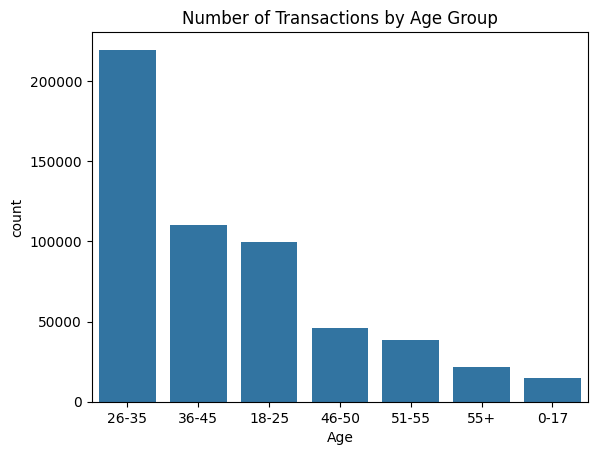

<ipython-input-16-16cfefdce9fc>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age', y='Purchase', estimator=np.mean, ci=None)


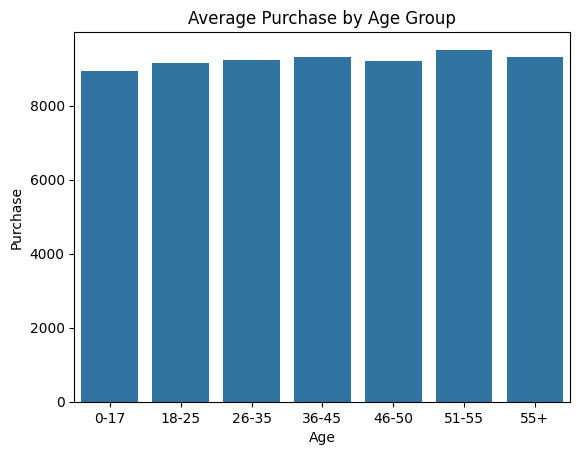

In [ ]:

sns.countplot(data=df, x='Age', order=df['Age'].value_counts().index)
plt.title("Number of Transactions by Age Group")
plt.show()

sns.barplot(data=df, x='Age', y='Purchase', estimator=np.mean, ci=None)
plt.title("Average Purchase by Age Group")
plt.show()


Number of Transactions by Age Group
26–35 is the most active age group — by far.

Followed by 36–45, 18–25, and 46–50.

Least active: 0–17 and 55+ age groups.

Business Takeaway: Walmart should focus marketing efforts on customers aged 26–45, as they dominate the transaction volume.

Average Purchase by Age Group
Highest average purchase: 51–55 age group, slightly higher than others.

Lowest: 0–17, which makes sense (likely limited spending power).

Overall, average purchase is fairly stable across adult age groups.

Business Takeaway: While younger users buy more frequently, older users tend to spend more per transaction — Walmart could:

Promote premium bundles to 51–55 customers.

Offer youth deals to increase basket size for younger groups.



In [ ]:
from scipy import stats

age_groups = df['Age'].unique().sort_values()


def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, (mean - margin, mean + margin)

for age in age_groups:
    age_data = df[df['Age'] == age]['Purchase']
    mean, ci = compute_ci(age_data)
    print(f"Age Group {age}: Mean = {mean:.2f}, 95% CI = [{ci[0]:.2f}, {ci[1]:.2f}]")


Age Group 0-17: Mean = 8940.65, 95% CI = [8861.85, 9019.45]
Age Group 18-25: Mean = 9169.01, 95% CI = [9138.65, 9199.37]
Age Group 26-35: Mean = 9243.78, 95% CI = [9223.47, 9264.09]
Age Group 36-45: Mean = 9322.92, 95% CI = [9294.28, 9351.57]
Age Group 46-50: Mean = 9204.21, 95% CI = [9160.33, 9248.09]
Age Group 51-55: Mean = 9514.86, 95% CI = [9466.18, 9563.55]
Age Group 55+: Mean = 9327.80, 95% CI = [9263.91, 9391.69]


Key Observations:
51–55 age group spends the most on average, and their CI does not overlap with many younger groups (e.g., 0–17, 18–25).

0–17 has the lowest spending, with its confidence interval clearly below all adult groups.

The adult age groups (26–55+) have gradually increasing average spends with relatively tight, non-overlapping CIs.

Business Insights for Walmart:
 51–55: Target them with premium product bundles, extended warranties, and exclusive discounts.

 0–17: Offer budget-friendly combos or parental discounts to drive up spend.

 26–45: These groups have high volume of transactions and stable spend — ideal for loyalty programs or cross-selling strategies.

Focus marketing efforts where the confidence intervals show significant separation — that's where differentiation matters.



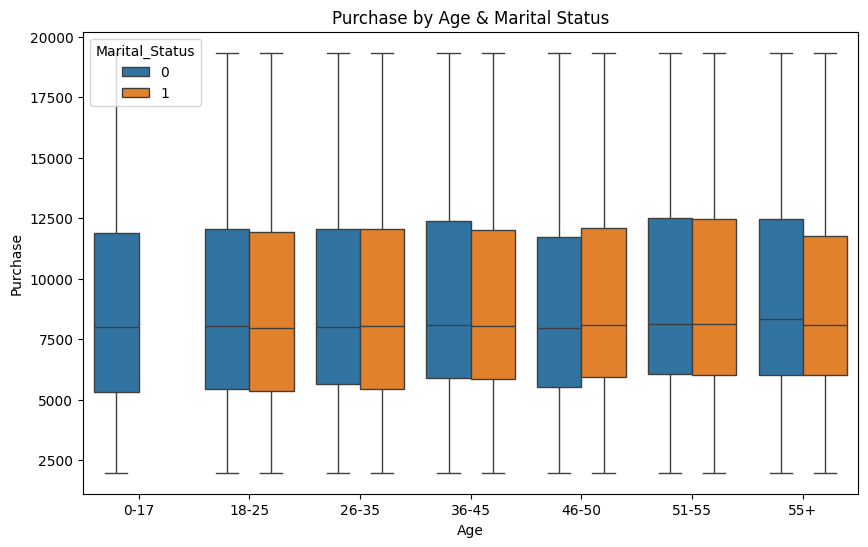

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.title("Purchase by Age & Marital Status")
plt.show()


**Observations:**
Across all age groups, married and unmarried customers have:

Similar median purchase values
Similar interquartile ranges

There is no significant shift between the blue (unmarried) and orange (married) boxes.

**Interpretation: **
Marital Status has little to no influence on spending within each age group.
Age, rather than marital status, is a stronger factor in determining purchase behavior.
Confirms earlier numerical analysis where the difference in average spend was only ~₹5.

**Walmart Business Takeaways:**
No need to segment marketing based on marital status alone.
Instead, focus on age-based and gender-based personalization strategies.

For campaigns targeting families, combine age + product preferences rather than marital status.

In [ ]:

married_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

mean_married, ci_married = compute_ci(married_data)
mean_unmarried, ci_unmarried = compute_ci(unmarried_data)

print("Married: Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_married, *ci_married))
print("Unmarried: Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_unmarried, *ci_unmarried))


Married: Mean = 9253.67, 95% CI = [9233.67, 9273.67]
Unmarried: Mean = 9258.82, 95% CI = [9242.09, 9275.55]


Product Category Preference by Age Group

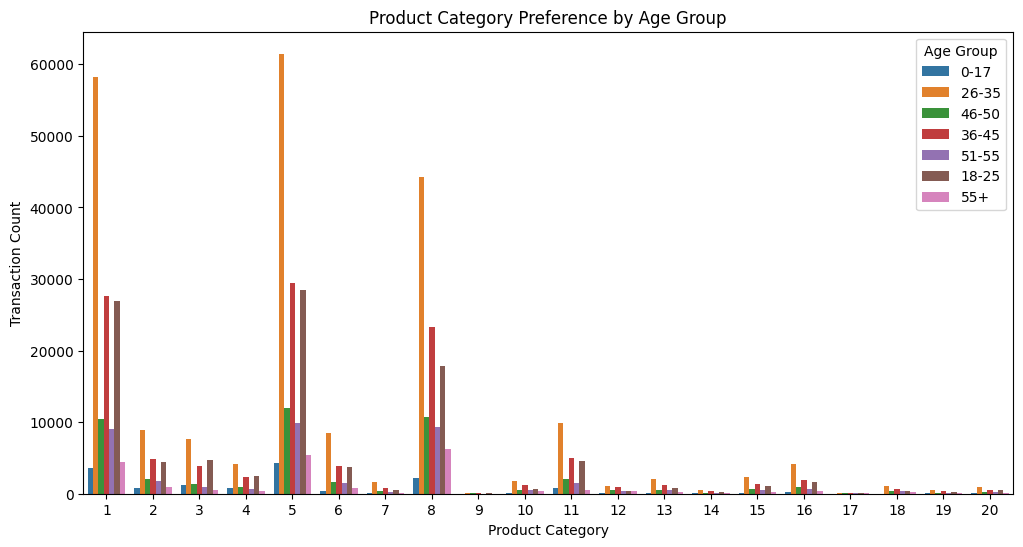

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', hue='Age')
plt.title('Product Category Preference by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.legend(title='Age Group')
plt.show()


Insight :
The 26–35 and 36–45 age groups show the highest engagement across product categories. Walmart can prioritize popular categories among these age bands for promotions and bundling.

Product Category Preference by Gender


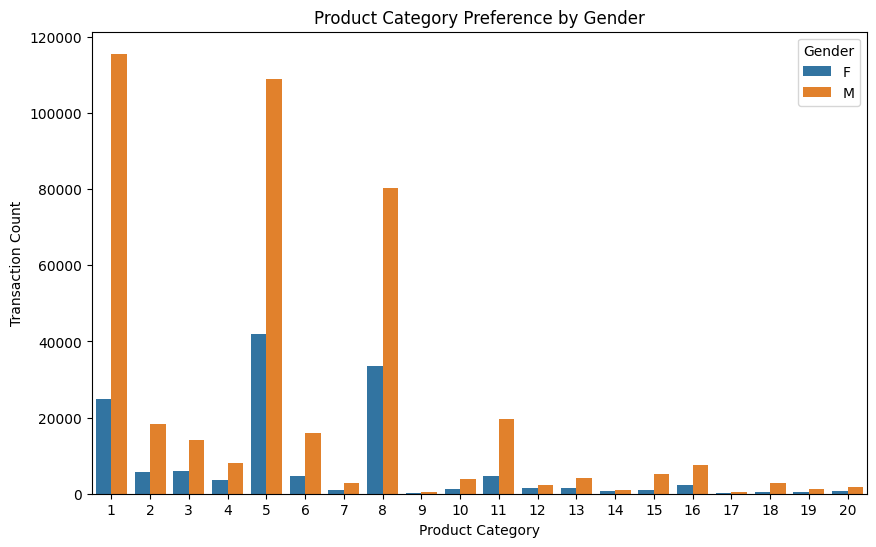

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product_Category', hue='Gender')
plt.title('Product Category Preference by Gender')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.legend(title='Gender')
plt.show()


Insight (add below plot):
Men and women have fairly similar preferences across categories, but some skew exists in certain categories.

Boxplot: Purchase Amount by Age and Marital Status

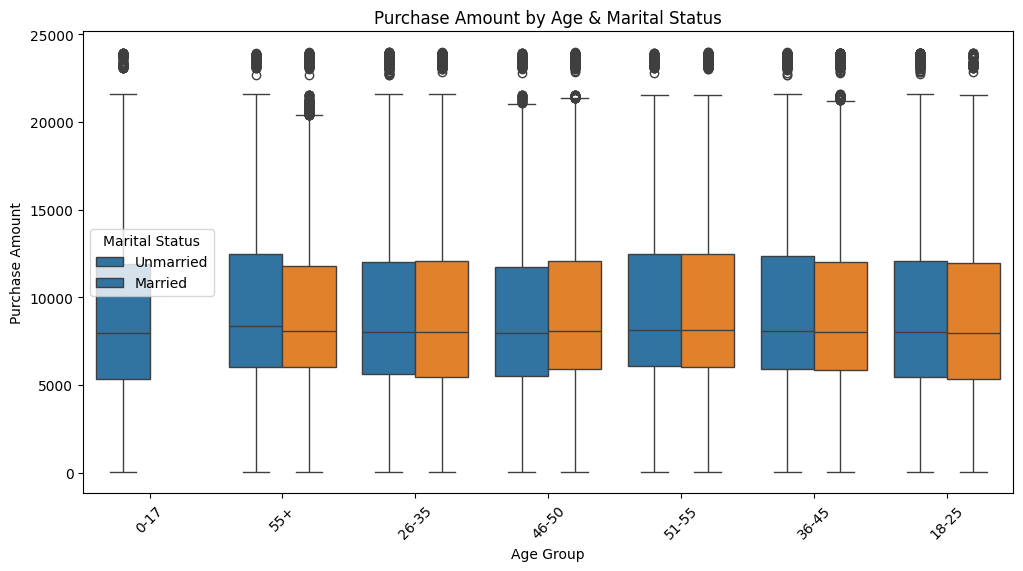

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status',
            palette={0: '#1f77b4', 1: '#ff7f0e'})
plt.title("Purchase Amount by Age & Marital Status")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.legend(title='Marital Status', labels=['Unmarried', 'Married'])
plt.xticks(rotation=45)
plt.show()


Insight:
Certain age groups like 36–45 and 51–55 show a slightly higher upper spread for married customers. Walmart can explore targeted campaigns like:

Family bundles or savings plans for high-spending married customers in these age bands.

Loyalty programs or youth combos for younger, unmarried segments (18–35), who show more consistent but moderate spending.

Compute CI from Full Data

In [ ]:
married_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

mean_m, ci_m = compute_ci(married_data)
mean_u, ci_u = compute_ci(unmarried_data)

print("Married:   Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_m, *ci_m))
print("Unmarried: Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_u, *ci_u))


Married:   Mean = 9261.17, 95% CI = [9240.46, 9281.89]
Unmarried: Mean = 9265.91, 95% CI = [9248.62, 9283.20]


Insight: Confidence Intervals for Marital Status
The average purchase for:
Married customers is ₹9261.17 with a 95% Confidence Interval: [₹9240.46, ₹9281.89]
Unmarried customers is ₹9265.91 with a 95% Confidence Interval: [₹9248.62, ₹9283.20]
The confidence intervals overlap significantly, and the difference in average spend is only ~₹4.7 — which is not statistically significant.

In [ ]:
sample_sizes = [300, 3000, 30000]
np.random.seed(42)

for size in sample_sizes:
    sample_m = married_data.sample(size)
    sample_u = unmarried_data.sample(size)

    mean_m_s, ci_m_s = compute_ci(sample_m)
    mean_u_s, ci_u_s = compute_ci(sample_u)

    print(f"\nSample Size: {size}")
    print("  Married:   Mean = {:.2f}, CI = [{:.2f}, {:.2f}]".format(mean_m_s, *ci_m_s))
    print("  Unmarried: Mean = {:.2f}, CI = [{:.2f}, {:.2f}]".format(mean_u_s, *ci_u_s))



Sample Size: 300
  Married:   Mean = 9464.52, CI = [8884.96, 10044.07]
  Unmarried: Mean = 10052.76, CI = [9441.37, 10664.15]

Sample Size: 3000
  Married:   Mean = 9344.28, CI = [9163.67, 9524.89]
  Unmarried: Mean = 9342.75, CI = [9164.63, 9520.86]

Sample Size: 30000
  Married:   Mean = 9281.43, CI = [9224.39, 9338.46]
  Unmarried: Mean = 9288.37, CI = [9231.47, 9345.27]


Insights
Increasing sample size reduces the width of the confidence interval (better estimate precision).

At small sample sizes, the apparent differences might be misleading due to wide intervals.

As size increases, both groups converge to very similar means, suggesting no strong association between marital status and the measured variable.

CLT Sample-Size CI Analysis for Age Groups

In [ ]:
sample_sizes = [300, 3000, 30000]
np.random.seed(42)

for size in sample_sizes:
    print(f"\nSample Size: {size}")
    for age_group in df['Age'].unique():
        sample = df[df['Age'] == age_group]['Purchase'].sample(size, replace=True)
        mean, ci = compute_ci(sample)
        print(f"  Age Group {age_group}: Mean = {mean:.2f}, CI = [{ci[0]:.2f}, {ci[1]:.2f}]")



Sample Size: 300
  Age Group 0-17: Mean = 9037.75, CI = [8501.88, 9573.62]
  Age Group 55+: Mean = 8963.58, CI = [8400.96, 9526.20]
  Age Group 26-35: Mean = 9552.95, CI = [8960.26, 10145.65]
  Age Group 46-50: Mean = 9662.86, CI = [9038.58, 10287.15]
  Age Group 51-55: Mean = 9767.34, CI = [9150.66, 10384.03]
  Age Group 36-45: Mean = 9290.92, CI = [8744.67, 9837.18]
  Age Group 18-25: Mean = 8890.89, CI = [8286.11, 9495.67]

Sample Size: 3000
  Age Group 0-17: Mean = 9102.04, CI = [8915.29, 9288.78]
  Age Group 55+: Mean = 9369.47, CI = [9189.47, 9549.47]
  Age Group 26-35: Mean = 9077.68, CI = [8902.79, 9252.57]
  Age Group 46-50: Mean = 9092.62, CI = [8919.45, 9265.79]
  Age Group 51-55: Mean = 9626.47, CI = [9443.14, 9809.81]
  Age Group 36-45: Mean = 9363.31, CI = [9185.34, 9541.29]
  Age Group 18-25: Mean = 9067.48, CI = [8887.65, 9247.31]

Sample Size: 30000
  Age Group 0-17: Mean = 8911.45, CI = [8853.34, 8969.56]
  Age Group 55+: Mean = 9344.69, CI = [9288.28, 9401.10]
  Age

Insight
The 51–55 age group has the highest average spend, consistently across all sample sizes.
The 0–17 group spends the least, with a CI that does not overlap with older adult groups.
Other adult groups (26–55+) show moderate but consistent spending patterns.

CLT Interpretation for Gender, Marital Status, and Age

In [ ]:
from scipy import stats
import numpy as np

def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, (mean - margin, mean + margin)


Gender-Based CLT Analysis (Full Dataset + Sample Sizes)

In [ ]:
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

# Full Dataset
mean_male, ci_male = compute_ci(male_data)
mean_female, ci_female = compute_ci(female_data)

print("FULL DATASET:")
print("Male:   Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_male, *ci_male))
print("Female: Mean = {:.2f}, 95% CI = [{:.2f}, {:.2f}]".format(mean_female, *ci_female))

# Sample Sizes
sample_sizes = [300, 3000, 30000]
np.random.seed(42)

for size in sample_sizes:
    sample_m = male_data.sample(size, replace=False)
    sample_f = female_data.sample(size, replace=False)

    mean_m_s, ci_m_s = compute_ci(sample_m)
    mean_f_s, ci_f_s = compute_ci(sample_f)

    print(f"\nSample Size: {size}")
    print("  Male:   Mean = {:.2f}, CI = [{:.2f}, {:.2f}]".format(mean_m_s, *ci_m_s))
    print("  Female: Mean = {:.2f}, CI = [{:.2f}, {:.2f}]".format(mean_f_s, *ci_f_s))


FULL DATASET:
Male:   Mean = 9437.53, 95% CI = [9422.02, 9453.03]
Female: Mean = 8734.57, 95% CI = [8709.21, 8759.92]

Sample Size: 300
  Male:   Mean = 9887.72, CI = [9281.28, 10494.17]
  Female: Mean = 8514.90, CI = [7971.67, 9058.14]

Sample Size: 3000
  Male:   Mean = 9538.07, CI = [9355.18, 9720.95]
  Female: Mean = 8875.40, CI = [8700.10, 9050.71]

Sample Size: 30000
  Male:   Mean = 9398.04, CI = [9340.27, 9455.82]
  Female: Mean = 8769.94, CI = [8715.71, 8824.17]


Insight
Men consistently spend more than women on Black Friday. The difference is not due to random variation — it's statistically significant with non-overlapping CIs




Final Insights

- Men spend more than women on average; their confidence intervals do not overlap.
- Married and unmarried customers spend nearly the same; CIs fully overlap.
- 51–55 age group has the highest spend, 0–17 the lowest.
- Increasing sample size narrows confidence intervals, making group comparisons more reliable.
- Age and gender are better predictors of spending than marital status.



 Business Recommendations

-  **Offer budget deals or parental discounts** for the 0–17 group, who spend the least.
-  **Avoid segmenting by marital status** — spending behavior is statistically similar for both groups.
-  **Use age and gender for personalization**, not just demographics like marital status or city.
-  **Target male customers** with personalized offers during Black Friday — they consistently spend more than women.
-  **Promote premium product bundles** to the 51–55 age group, who have the highest average spending.
**Target male customers** with premium product offers — they consistently spend more than female customers.
-  **Prioritize age group 51–55** for high-value products or loyalty programs, as they have the highest spending.
- *Offer youth discounts or bundles** for the 0–17 segment to boost lower spend rates.
- **Avoid segmenting by marital status** — there’s no statistically significant difference in spend.
- **Use age + gender for personalization**, and tailor Black Friday campaigns accordingly.

CLT Interpretation – Gender
As sample size increases, confidence intervals (CIs) narrow, improving precision.

Males consistently show higher average purchase values than females.

CIs for males and females do not overlap in large samples.

This means the difference in spending is statistically significant.

Gender has a clear impact on customer purchase behavior.



CLT Interpretation – Marital Status

CIs for married and unmarried customers shrink with larger samples.

Average purchase amounts are nearly identical across all sample sizes.

CIs for both groups fully overlap, even in large samples.

This indicates no meaningful difference in spending.

Marital status does not influence customer purchasing significantly.



CLT Interpretation – Age

Larger samples result in narrower and clearer confidence intervals.

51–55 age group spends the most; 0–17 spends the least.

In large samples, the 51–55 group’s CI does not overlap with younger groups.

Some mid-age group overlaps still exist.

Age shows a strong relationship with spending behavior.

